In [1]:
from bmc.simulate import simulate

BMCTool simulation: 100%|██████████| 328/328 [00:00<00:00, 20190.67it/s]


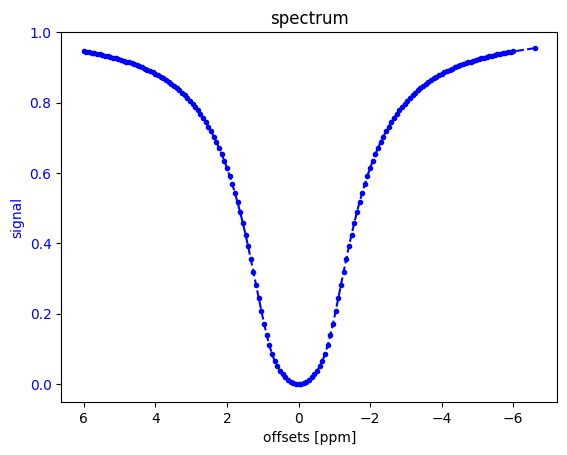

In [2]:
seq_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/default_seqid.seq'
config_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/config_1pool.yaml'

seq_path_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/default_seqid.seq'
config_path_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/config_1pool.yaml'


simulate(config_file=config_path, seq_file=seq_path, show_plot=True)
# simulate(config_file=config_path_win, seq_file=seq_path_win, show_plot=True)  # simulation windows

In [3]:
from bmc.simulate import simulate_fid

BMCTool simulation:   0%|          | 0/2 [00:00<?, ?it/s]

BMCTool simulation: 100%|██████████| 2/2 [00:00<00:00, 28.25it/s]


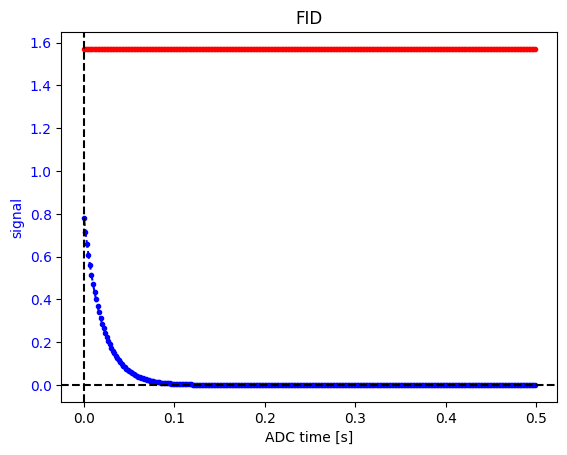

In [4]:
seq_path_gauss = '/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss.seq'
seq_path_gauss_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/simple_gauss.seq'

sim = simulate_fid(config_file=config_path, seq_file=seq_path_gauss, adc_time=.5, show_plot=True)
# sim = simulate_fid(config_file=config_path_win, seq_file=seq_path_gauss_win, adc_time=.5, show_plot=True)  # simulation windows

In [5]:
import numpy as np
np.abs(sim.get_magtrans()[1][:10])

array([0.77947589, 0.71715244, 0.6598121 , 0.60705643, 0.55851888,
       0.51386218, 0.47277603, 0.43497494, 0.40019627, 0.36819834])